# MNIST Handwritten Digit Recognition

In [1]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline 

In [2]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Вывод формы данных для обучения
x_train_org.shape

(60000, 28, 28)

Right now, the images that we will use to train the neural network are represented as matrices of numbers, where each number is the brightness value of a pixel (ranging from 0 to 255). There are 60,000 such images in the training dataset, and their size is 28 by 28 pixels.

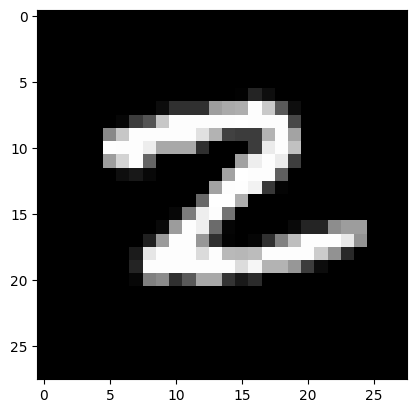

In [4]:
# Номер картинки
n = 143

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [5]:
# Вывод метки класса для n-го изображения
print(y_train_org[n])

2


In [6]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)   
x_test = x_test_org.reshape(x_test_org.shape[0], -1)   

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [7]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [9]:
# Задание константы количества распознаваемых классов
CLASS_COUNT = 10

In [10]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [11]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [12]:
# Вывод примера одного выходного вектора
print(y_train[0]) 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [14]:
# Вывод метки, соответствующей 36-му элементу
print(y_train_org[36])

6


### Creating a neural network

In [17]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu')) 

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax')) 

In [18]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 800)               628000    
                                                                 
 dense_2 (Dense)             (None, 400)               320400    
                                                                 
 dense_3 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
!pip install pydot

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [21]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Neural Network Training

In [22]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 [==============================] - 49s 85ms/step - loss: 0.2097 - accuracy: 0.9379
Epoch 2/15
469/469 [==============================] - 40s 86ms/step - loss: 0.0772 - accuracy: 0.9755
Epoch 3/15
469/469 [==============================] - 48s 102ms/step - loss: 0.0478 - accuracy: 0.9851
Epoch 4/15
469/469 [==============================] - 47s 101ms/step - loss: 0.0348 - accuracy: 0.9886
Epoch 5/15
469/469 [==============================] - 39s 84ms/step - loss: 0.0187 - accuracy: 0.9938
Epoch 8/15
469/469 [==============================] - 49s 104ms/step - loss: 0.0128 - accuracy: 0.9959
Epoch 9/15
469/469 [==============================] - 36s 77ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 10/15
469/469 [==============================] - 38s 81ms/step - loss: 0.0141 - accuracy: 0.9950
Epoch 11/15
469/469 [==============================] - 33s 71ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 12/15
469/469 [==============================] - 32s 68ms/step - loss: 

In [23]:
model.save_weights('model.h5')
model.load_weights('model.h5')

### Handwritten digit recognition

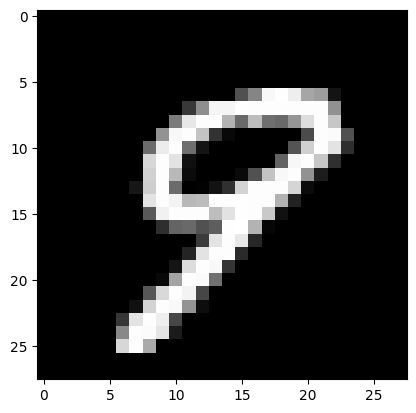

In [24]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [25]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(784,)


In [26]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [27]:
# Распознавание примера
prediction = model.predict(x) 

1/1 [==============================] - 2s 2s/step


In [28]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[2.2660418e-16 1.1000461e-15 1.6401531e-14 5.1018759e-11 5.6101243e-08
  3.9401080e-15 9.7409897e-18 4.8741278e-10 3.1279527e-08 1.0000000e+00]]


In [29]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[2.2660418e-16 1.1000461e-15 1.6401531e-14 5.1018759e-11 5.6101243e-08
  3.9401080e-15 9.7409897e-18 4.8741278e-10 3.1279527e-08 1.0000000e+00]]


In [30]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 9


In [31]:
# Вывод правильного ответа для сравнения
print(y_test_org[n_rec])

9
